# Car Recommender System

For this project I have Used KMeans Clustering 

The Data used here contains information about cars such as model,manufacturer,price,mileage ,etc.  

The Goal Achieved here is when user enters a car model name,
the algo will return all the cars name in recomendation 
where manufacturer of entered car and cars in recomendation are same

Imported required libraries and Data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
A=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Datasets/Cars93.csv')
A

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [3]:
C=pd.DataFrame(A[['Manufacturer','Model']])

In [4]:
A['Model'].nunique()

93

In [5]:
A['Manufacturer'].nunique()

32

In [6]:
Z=pd.DataFrame(pd.get_dummies(C))

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=37)
model = km.fit(Z)
model.labels_


#The no. of clusters selected as it should form unique groups

array([20, 20, 13, 13, 36, 11, 11, 11, 11, 16, 16,  2, 33,  2, 34,  2,  2,
        2,  2, 22, 12, 12,  9,  9,  9, 32,  9,  9, 26, 26,  1,  1,  1,  1,
        1,  1,  1,  1, 17, 17, 21, 21, 21,  3,  3,  3,  3, 27, 23, 23, 19,
       19,  6,  6,  6,  6,  6, 18, 18, 30, 30,  0,  0,  5,  5,  5,  5, 10,
       10, 10, 10, 35,  4,  4,  4,  4,  4, 25, 24, 15, 15, 15, 31, 29,  7,
        7,  7, 14, 28, 14, 14,  8,  8])

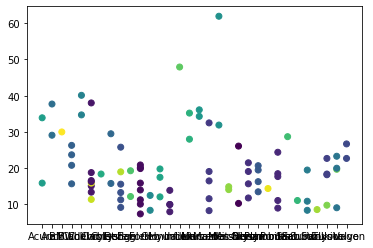

In [8]:
import matplotlib.pyplot as plt
plt.scatter(A.Manufacturer,A.Price,c=model.labels_)

car=input('Enter name of car')
print('similar cars to',)

In [9]:
clusters=km

In [10]:
X=pd.DataFrame(A[['Model','Manufacturer']])
X['cluster']=model.labels_

In [11]:
X

,Model,Manufacturer,cluster
0,Integra,Acura,20
1,Legend,Acura,20
2,90,Audi,13
3,100,Audi,13
4,535i,BMW,36
...,...,...,...
88,Eurovan,Volkswagen,28
89,Passat,Volkswagen,14
90,Corrado,Volkswagen,14
91,240,Volvo,8


In [24]:
X[X.cluster==1]

,Model,Manufacturer,cluster
30,Festiva,Ford,1
31,Escort,Ford,1
32,Tempo,Ford,1
33,Mustang,Ford,1
34,Probe,Ford,1
35,Aerostar,Ford,1
36,Taurus,Ford,1
37,Crown_Victoria,Ford,1


In [25]:
cm = input("Enter a car Make to see similar cars: ")

clu_no=list(X[X.Model==cm].cluster)[0]

F=list(X[X.cluster == clu_no].Model)
F.remove(cm)

print("Entered Car: ",cm)
print("Similar Cars: ",F)

Enter a car Make to see similar cars: Festiva
Entered Car:  Festiva
Similar Cars:  ['Escort', 'Tempo', 'Mustang', 'Probe', 'Aerostar', 'Taurus', 'Crown_Victoria']
